# Sentiment Analysis for Mental Health Monitoring 🤯


<img src="https://img.freepik.com/free-vector/mental-health-awareness-concept_23-2148531011.jpg" alt="Sample Image" width="100%" height="700">




## Sentiment Analysis for Mental Health Monitoring 🤯
___

> [dataset source](https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health) 🔗

---


```


```
---


## **About The Datset** 🧷
This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.

---
## **Data Souce** 🌍
The dataset integrates information from the following Kaggle datasets:

 - 3k Conversations Dataset for Chatbot
 - Depression Reddit Cleaned
 - Human Stress Prediction
 - Predicting Anxiety in Mental Health Data
 - Mental Health Dataset Bipolar
 - Reddit Mental Health Data
 - Students Anxiety and Depression Dataset
 - Suicidal Mental Health Dataset
 - Suicidal Tweet Detection Dataset
---

###  **Datset Over View**  :

* **Description:**

    This dataset is a comprehensive collection of 50,000 text statements related to mental health, each tagged with one of seven mental health statuses. The primary purpose of this dataset is to assist in building machine learning models for classifying mental health conditions based on textual data, such as social media posts or other user-generated content.

* **Columns:**
  1. **unique_id**: A unique identifier for each entry.
  2. **statement**: A piece of text, typically a statement or comment, associated with a particular mental health status.
  3. **status**: The mental health status assigned to the statement. The possible categories are:
    - Normal
    - Depression
    - Suicidal
    - Anxiety
    - Stress
    - Bi-Polar
    - Personality Disorder

---
### **Usage** :
This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data.
It can be used in various applications such as:

- Chatbot development for mental health support.
- Sentiment analysis to gauge mental health trends.
-
---

### **How we use NLP Concepts**


  In our text processing methodology, we begin by removing punctuation, URLs, and hyperlinks from the statements. Additionally, we eliminate stop words, such as "is," "are," and "the," to enhance the focus on more informative terms.


  In the realm of morphological analysis, we extract the stems of the words. Subsequently, we employ a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to transform the processed text into a vector representation. This vector is then utilized to fit the mode

---

### **Conlusion**
  in the conclusion we train and tune  a four model wich is :
  * SVM  
  * Logistic Regression
  * Neural Ntwork
  * KNN
  the first three give a Convergent results with accuracy near to 76 % , and the last one give  a 65 % acc .

```css












```

---



## Two Level Classification  Approach

---

### About Two-Level Classification

In a two-level classification approach, we break down a multi-class classification problem into two stages:

1. **Stage 1 - Binary Classification**:
   - This stage first classifies data into two  categories: **Normal** ans **Non-Normal**.
   - By creating this separation, we simplify the problem and reduce the initial complexity, allowing the model to focus on distinguishing between these high-level classes.
   - This binary classifier uses features from the full dataset, ensuring that it can accurately detect if a statement falls into the "Normal" or "Non-Normal" category.

2. **Stage 2 - Multi-Class Classification**:
   - In this stage, we take statements classified as **Non-Normal** from Stage 1 and further classify them into specific mental health categories such as **Depression**, **Suicidal**, **Anxiety**, **Stress**, **Bi-Polar**, and **Personality Disorder**.
   - This multi-class classifier uses data that has already been identified as "Non-Normal," focusing on differentiating among various mental health conditions.
   
### Why Two-Level Classification?

- 🌵**Improved Accuracy**: This approach allows each classifier to focus on a subset of the problem, potentially increasing accuracy by reducing the complexity each model has to handle.
- 🍀 **Efficient Use of Resources**: By filtering out "Normal" cases in Stage 1, Stage 2 can concentrate only on differentiating among the specific mental health conditions, making it more efficient.
- 🦠 **Handling Imbalance**: Many datasets are imbalanced, with "Normal" cases being more common. Splitting the classification into two levels allows us to address class imbalance in each level separately.

### How It Works in This Model

1. **Data Preparation**:
   - First, we preprocess the dataset by cleaning the text and extracting features (e.g., TF-IDF, POS tags, emojis).
   - Then, we split the data for training and testing each stage separately.

2. **Training**:
   - **Stage 1**: We train a binary classifier on the full training data to classify statements as **Normal** or **Non-Normal**.
   - **Stage 2**: We train a multi-class classifier on the subset of training data labeled as **Non-Normal**, focusing only on the six specific mental health conditions.

3. **Testing**:
   - For each test instance, we first use Stage 1 to determine if it’s "Normal" or "Non-Normal."
   - If classified as **Non-Normal**, the instance is passed to Stage 2, where it is classified into one of the specific mental health categories.

### Evaluation and Metrics

- **Stage-Specific Metrics**: Each stage is evaluated separately, with accuracy, recall, precision, and F1-score measured for both the binary and multi-class classifiers.
- **Combined Evaluation**: Finally, we combine predictions from both stages to evaluate the overall performance of the two-level classification system.

This two-level approach allows us to accurately identify both "Normal" and specific mental health conditions, leveraging targeted classification strategies to improve overall accuracy and interpretability.

# *Dataset Loading and Preparing*

### Constants

In [1]:
data_read_path = '/content/drive/MyDrive/CombinedData.csv'
data_clean_path='/content/drive/MyDrive/CombinedDataCleaned.csv'

## Import Libraries
---
lets start by importing the nessacary libraries

### import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
#import emoji

import re
import random
#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
from textblob import TextBlob


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

#import stanza
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


### Download packages

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [5]:
pip install stanza


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 30.2 MB/s eta 0:00:00


## Loading the dataset

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv(data_read_path, index_col=0)

In [8]:
df.head(3)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


**notes1:** as we se at first , we have a three column the id which we should drop it, the statment that represent the "input" and the output which is the status. so our problem is just a classification and we need to make a nlp pre processing to extract feature  as we can from the statment to make them as input to the model.

**note2:** as we say, also we wil add some statistical feature (test len) to  nlp extracted features.

## some random example
---
* to see the statement how itis

In [9]:
# Group by status and get a random statement from each group
random_statements = df.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}\n")
    print(f"Statement: {statement}\n")
    print("-----------------------------------")

Status: Anxiety

Statement: Sweating Whenever I visit in a group of 3 or more in the same room after about 45 minutes I start to sweat a lot and smell and feel really hot. It doesn’t matter if I’m with strangers, friends or family.  
Does anyone else feel like this? Or have any suggestions?

-----------------------------------
Status: Bipolar

Statement: Bipolar Reddit, what's the best life lesson you've learned after coming out of a Psychosis? After my first one I basically had to reprogram my mind. I found that there was a lot of nonsense thoughts that I didn't even agree with. So I learned to be mindful of the ideas and thoughts I allow to circle around in my mind.


What's yours???


Edit: Apparently Bipolar people are wise as fuck.

-----------------------------------
Status: Depression

Statement: I will keep this short.My wife and I have been together since the age of 15. 21 years without break. we are the type of couple to argue over the phone about who hangs up first. Some yea

---
## Data set Descriping

In [10]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


## Missings Value Removal

In [11]:
df.isna().sum()

,0
statement,362
status,0


In [12]:
df.dropna(inplace = True)
df.isna().sum()

,0
statement,0
status,0


## What is our Labels 'target'?



In [13]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [14]:
df['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


## How the samples are distributed over the status ?

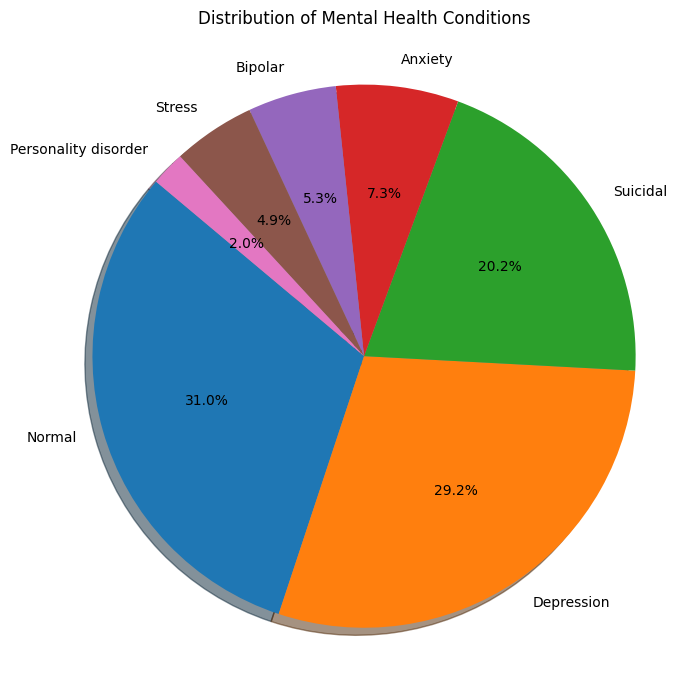

In [15]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors for 7 categories)
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

## How the statements length are distibuted?

#### define statement legth column

In [16]:
# calculate the length of each statement
df['statemnent_length'] = df['statement'].apply(lambda text : len(text))


In [17]:
# calculate the length of each statement
df['num_of_words'] = df['statement'].apply(lambda text : len(text.split()))

#### statement length distribution

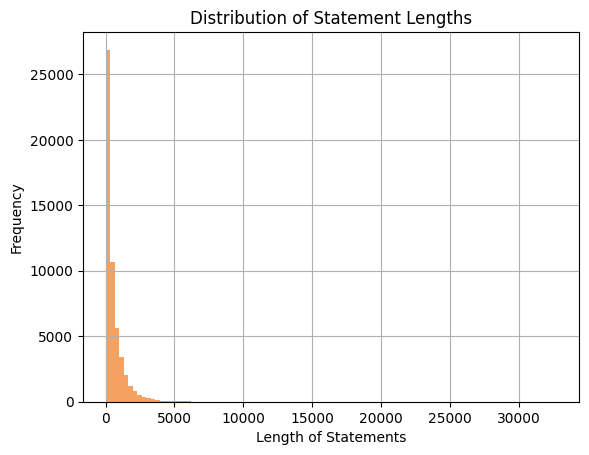

In [18]:
# plot the distribution of statement lengths
df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Statement Lengths (Without Outliers)

In [19]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['statemnent_length'].quantile(0.25)
Q3 = df['statemnent_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

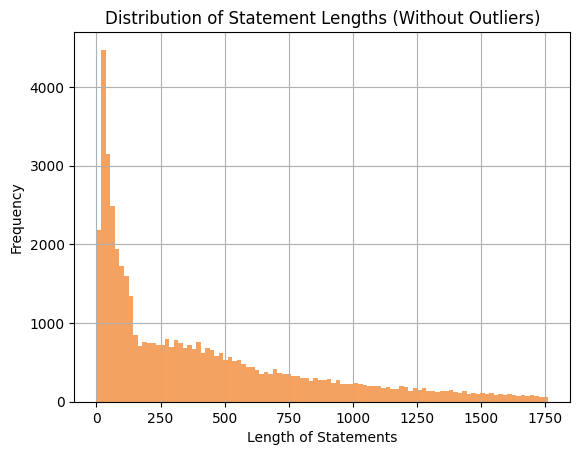

In [20]:
# Filter out the outliers
filtered_df = df[(df['statemnent_length'] >= lower_bound) & (df['statemnent_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

---
```








```
```








```
---

## Distributions : *Can we find simple classifier ?*

### Helpper function

In [21]:
status_analysis = df.groupby('status').agg({
    'statemnent_length': ['mean', 'median', 'std'],
    'num_of_words': ['mean', 'median', 'std']
})

### Box plot of statement length vs status

In [22]:
# Filter the DataFrame to show only rows where the 'sentence_length' is less than 10
df_short_sentences = df[df['statemnent_length'] <400]

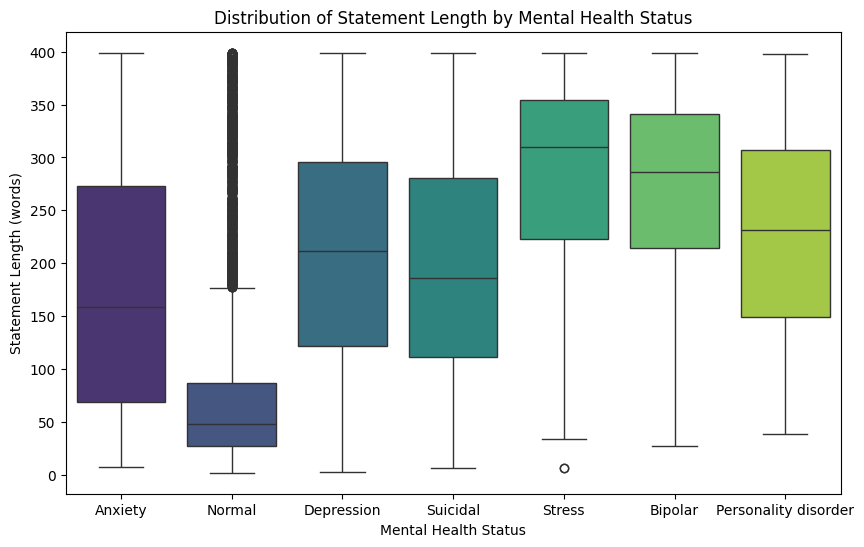

In [23]:
# Plot a box plot of statement length by status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_short_sentences, x='status', y='statemnent_length', palette="viridis")
plt.title("Distribution of Statement Length by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Statement Length (words)")
plt.show()

### Avarage of characters per statment

Text(0.5, 1.0, 'Avarage of characters per statment')

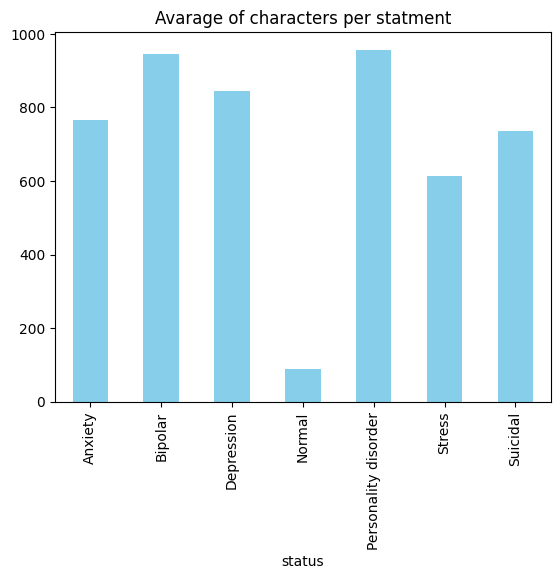

In [24]:
status_analysis['statemnent_length']['mean'].plot(kind='bar',color='skyblue')
plt.title('Avarage of characters per statment')

### Avarage of words per statment

Text(0.5, 1.0, 'Avarage of words per statment')

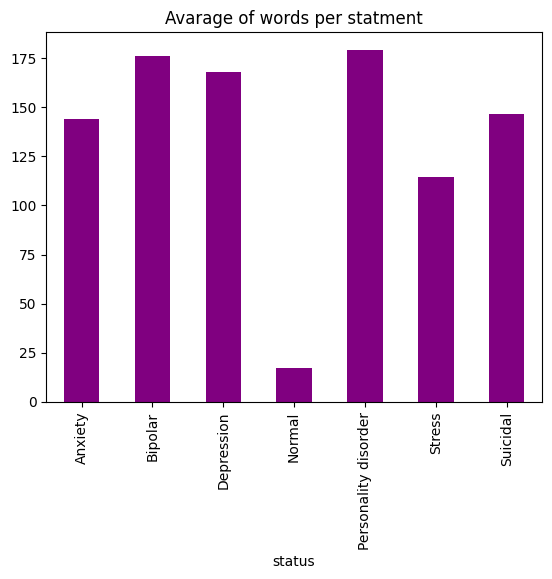

In [25]:
status_analysis['num_of_words']['mean'].plot(kind='bar',color='purple')
plt.title('Avarage of words per statment')

## What is the frequency of POS Tags ?

#### Helper function

In [26]:
def plot_pos_frequency(df):
    # Combine all statements into one text
    blob = TextBlob(" ".join(df['statement'].astype(str)))

    # Extract POS tags and create DataFrame
    pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
    pos_counts = pos_df['pos'].value_counts()[:50]  # Get top 50 POS tags by frequency

    # Plot the frequency of POS tags
    plt.figure(figsize=(10, 6))
    pos_counts.plot(kind='bar')
    plt.xlabel("Part Of Speech")
    plt.ylabel("Frequency")
    plt.title("Frequency of Parts of Speech in Statements")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


#### POS Frequency

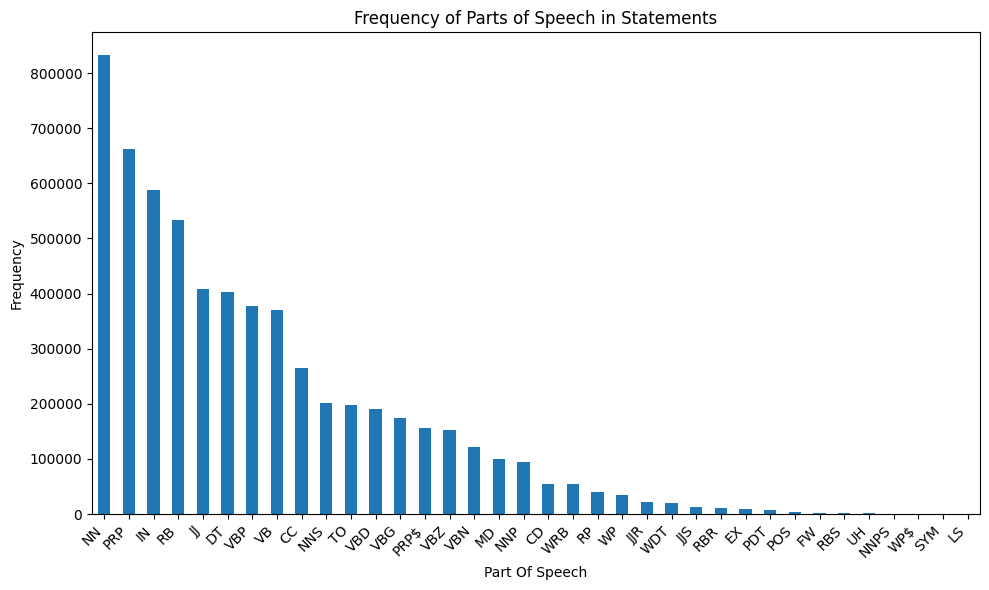

In [27]:
# Run the function on your DataFrame
plot_pos_frequency(df)

# Saving the Cleaned Dataset

In [28]:
df.shape

(52681, 4)

In [29]:
df.to_csv(data_clean_path,index=0)